In [26]:
from __future__ import division, print_function
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import MaxPooling1D, Dense, Dropout,Flatten, Activation, Embedding, Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.python.keras.datasets import imdb
data = np.load('fac_cond256_unit8.npz')
raw_X=data['cond']
# raw_X=np.squeeze(data['cond'],-1)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)[:,1]
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 128   
NUM_EPOCHS = 50
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain[0].shape)

(2000, 65, 1) (1000, 65, 1) (2000, 1) (1000, 1)
(65, 1)


In [27]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3,padding='same', input_shape=( 65,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3,padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.add(Activation('tanh'))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 65, 32)            128       
_________________________________________________________________
batch_normalization_21 (Batc (None, 65, 32)            128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 32, 32)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 32, 64)            6208      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 64)            256       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 16, 64)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 16, 128)          

In [28]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

Epoch 1/50
16/16 [==============================] - 2s 34ms/step - loss: 0.7499 - mean_squared_error: 0.7499 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 2/50
16/16 [==============================] - 0s 25ms/step - loss: 0.4790 - mean_squared_error: 0.4790 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 3/50
16/16 [==============================] - 0s 25ms/step - loss: 0.3473 - mean_squared_error: 0.3473 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 4/50
16/16 [==============================] - 0s 27ms/step - loss: 0.2838 - mean_squared_error: 0.2838 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 5/50
16/16 [==============================] - 0s 25ms/step - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 6/50
16/16 [==============================] - 0s 25ms/step - loss: 0.1606 - mean_squared_error: 0.1606 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 7/50
16/16 [================

In [29]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 
pre = model.predict(Xtest, batch_size=BATCH_SIZE)

8/8 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_squared_error: 0.0036

MSE: 0.004, RMSE: 0.060


In [34]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae1=np.mean(ae)
mse1 = math.sqrt(mae1)
print("MAE1: {:.3f}".format(mae1))
print("MSE1: {:.3f}".format(mse1))

MAE1: 0.021
MSE1: 0.146


In [35]:
print(pre.shape,Ytest.shape)

(1000, 1) (1000, 1)


In [36]:
print(pre[0],Ytest[0])

[0.8221877] [0.825891]


In [37]:
ae[0]

array([0.00370328])

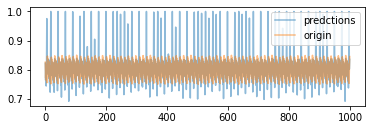

In [38]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=0.5)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])